In [1]:
!python -V

Python 3.11.3


In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

## Q1. Downloading the data
### Read the data for January. How many columns are there?

In [6]:
df = pd.read_parquet('./data_homework/yellow_tripdata_2022-01.parquet')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


In [7]:
print("The number of columns is:", df.shape[1])

The number of columns is: 19


## Q2. Computing duration

### Now let's compute the duration variable. It should contain the duration of a ride in minutes.

### What's the standard deviation of the trips duration in January?

In [8]:
print(df.shape)
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

(2463931, 19)


In [9]:
stats = df.describe()

In [10]:
print("The std of duration column is", stats.loc["std","duration"])

The std of duration column is 46.44530513776499


## Q3. Dropping outliers

### Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

### What fraction of the records left after you dropped the outliers?

In [11]:
records_before_dropped_outliers = df.shape[0]
df = df[(df.duration >= 1) & (df.duration <= 60)]
records_after_dropped_outliers = df.shape[0]

print('Records left before you dropped the outliers',records_before_dropped_outliers)
print('Records left after you dropped the outliers',records_after_dropped_outliers)

Records left before you dropped the outliers 2463931
Records left after you dropped the outliers 2421440


In [12]:
print('Fraction of the records left after you dropped the outliers', records_after_dropped_outliers/records_before_dropped_outliers)
print('Percent of the records left after you dropped the outliers', (records_after_dropped_outliers/records_before_dropped_outliers)*100)


Fraction of the records left after you dropped the outliers 0.9827547930522406
Percent of the records left after you dropped the outliers 98.27547930522405


## Q4. One-hot encoding

#### Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

     Turn the dataframe into a list of dictionaries
     Fit a dictionary vectorizer
     Get a feature matrix from it

### What's the dimensionality of this matrix (number of columns)?

In [13]:
categorical = ['PULocationID', 'DOLocationID']
#df[categorical] = df[categorical].astype(str)
df[categorical] = df[categorical].astype(str)

/tmp/ipykernel_15157/3253540147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [14]:
df[categorical]

,PULocationID,DOLocationID
0,142,236
1,236,42
2,166,166
3,114,68
4,68,163
...,...,...
2463926,90,170
2463927,107,75
2463928,113,246
2463929,148,164


In [15]:
train_dicts = df[categorical].to_dict(orient='records')
train_dicts

[{'PULocationID': '142', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '42'},
 {'PULocationID': '166', 'DOLocationID': '166'},
 {'PULocationID': '114', 'DOLocationID': '68'},
 {'PULocationID': '68', 'DOLocationID': '163'},
 {'PULocationID': '138', 'DOLocationID': '161'},
 {'PULocationID': '233', 'DOLocationID': '87'},
 {'PULocationID': '238', 'DOLocationID': '152'},
 {'PULocationID': '166', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '141'},
 {'PULocationID': '141', 'DOLocationID': '229'},
 {'PULocationID': '114', 'DOLocationID': '90'},
 {'PULocationID': '234', 'DOLocationID': '113'},
 {'PULocationID': '246', 'DOLocationID': '79'},
 {'PULocationID': '43', 'DOLocationID': '140'},
 {'PULocationID': '239', 'DOLocationID': '151'},
 {'PULocationID': '148', 'DOLocationID': '141'},
 {'PULocationID': '237', 'DOLocationID': '107'},
 {'PULocationID': '7', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '263'},
 {'PULocationID': '263', 'DOLoc

In [16]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_train

<2421440x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

In [17]:
X_train.shape

(2421440, 515)

In [18]:
print("The number of columns is", X_train.shape[1])

The number of columns is 515


## Q5. Training a model

### Now let's use the feature matrix from the previous step to train a model.

    Train a plain linear regression model with default parameters
    Calculate the RMSE of the model on the training data

### What's the RMSE on train?

In [19]:
target = 'duration'
y_train = df[target].values

In [20]:
X_train.shape, y_train.shape

((2421440, 515), (2421440,))

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

rmse = mean_squared_error(y_train, y_pred, squared=False)

In [22]:
rmse

6.986190769549357

In [23]:
print("The RMSE on train is", rmse)

The RMSE on train is 6.986190769549357


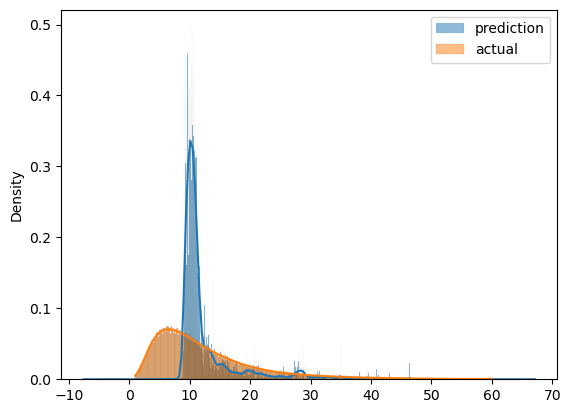

In [24]:
sns.histplot(y_pred, kde=True,label='prediction', stat="density")
sns.histplot(y_train, kde=True,label='actual', stat="density")

plt.legend()

/tmp/ipykernel_15157/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_15157/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


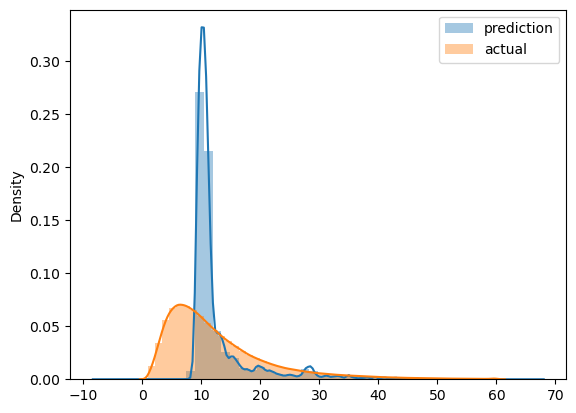

In [25]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

## Q6. Evaluating the model

### Now let's apply this model to the validation dataset (February 2022).

### What's the RMSE on validation?

In [26]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [27]:
df_train = read_dataframe('./data_homework/yellow_tripdata_2022-01.parquet')
df_val = read_dataframe('./data_homework/yellow_tripdata_2022-02.parquet')

In [28]:
len(df_train), len(df_val)

(2421440, 2918187)

In [29]:
df_train.shape

(2421440, 20)

In [30]:
df_val.shape

(2918187, 20)

In [31]:
dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [32]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

rmse_val = mean_squared_error(y_val, y_pred, squared=False)

In [34]:
print("the RMSE on validation is", rmse_val)

the RMSE on validation is 7.786407870395467


In [35]:
with open('models/lin_reg_home.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [36]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

8.116069832221214